# **Ensayo SVM**

Support vector machines (SVMs)  son un conjunto de métodos de aprendizaje supervisado que se utilizan para la clasificación, la regresión y la detección de outliers

**Las ventajas son:**









*   Efectivo en espacios de gran dimensión.
*   Sigue siendo eficaz en los casos en que el número de dimensiones es mayor que el número de muestras.
*   Utiliza un subconjunto de puntos de entrenamiento en la función de decisión (llamados vectores de soporte), por lo que también es eficiente en memoria.
*   Versátil: se pueden especificar diferentes funciones del kernel para la función de decisión. Se proporcionan kernels comunes, pero también es posible especificar kernels personalizados.


**Las desventajas incluyen:**


*   Si el número de características es mucho mayor que el número de muestras, evite el ajuste excesivo al elegir las funciones del Kernel y el término de regularización es crucial.
*   Las SVM no proporcionan directamente estimaciones de probabilidad, estas se calculan mediante una costosa validación cruzada de five-fold.








# ¿Qué es Support Vector Machine?

El objetivo del algoritmo de la máquina de vectores de soporte es encontrar un hiperplano en un espacio N-dimensional (N - el número de características) que clasifique claramente los puntos de datos.

![](https://miro.medium.com/max/600/0*9jEWNXTAao7phK-5.png)
![](https://miro.medium.com/max/600/0*0o8xIA4k3gXUDCFU.png)

Para separar las dos clases de puntos de datos, hay muchos hiperplanos posibles que podrían elegirse. Nuestro objetivo es encontrar un plano que tenga el margen máximo, es decir, la distancia máxima entre puntos de datos de ambas clases. Maximizar la distancia del margen proporciona cierto refuerzo para que los puntos de datos futuros se puedan clasificar con más confianza.

Los hiperplanos son límites de decisión que ayudan a clasificar los puntos de datos. Los puntos de datos que caen a ambos lados del hiperplano se pueden atribuir a diferentes clases. Además, la dimensión del hiperplano depende del número de características. Si el número de entidades de entrada es 2, entonces el hiperplano es solo una línea. Si el número de entidades de entrada es 3, entonces el hiperplano se convierte en un plano bidimensional. Se vuelve difícil imaginar cuando el número de funciones supera las 3.

![](https://miro.medium.com/max/700/0*ecA4Ls8kBYSM5nza.jpg)

Los vectores de soporte son puntos de datos que están más cerca del hiperplano e influyen en la posición y orientación del hiperplano. Usando estos vectores de soporte, maximizamos el margen del clasificador. Eliminar los vectores de soporte cambiará la posición del hiperplano. Estos son los puntos que nos ayudan a construir nuestra SVM.

# Hypothesis
![](https://miro.medium.com/max/2000/1*kHe3Mntx7cgFkFfurTIijA.png)

# Funcion de Costo
![](https://miro.medium.com/max/2080/1*3xErahGeTFnbDiRuNXjAuA.png)

![](https://miro.medium.com/max/1400/1*GQAd28bK8LKOL2kOOFY-tg.png)



# The kernel trick

SVM no necesita los vectores reales , en realidad solo necesita los productos punto entre ellos. Esto significa que podemos eludir los costosos cálculos de las nuevas dimensiones.


Nuevo espacio que queremos: 

z = x² + y²

Averigüe cómo se ve el producto punto en ese espacio:

a · b = xa · xb  +  ya · yb  +  za · zb

a · b = xa · xb  +  ya · yb +  (xa² + ya²) · (xb² + yb²)

Indicarle a SVM que haga lo suyo, pero usando el nuevo producto punto, a esto lo llamamos función del kernel.



# Ejemplo encontrado en la Web
En el ejemplo podemos ver los diferentes planos generados utilizando diferentes kernel para SVM

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

In [4]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2] # we only take the first two features. We could
 # avoid this ugly slicing by using a two-dim dataset
y = iris.target

In [7]:
C = 1.0 # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=1).fit(X, y)

In [8]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))

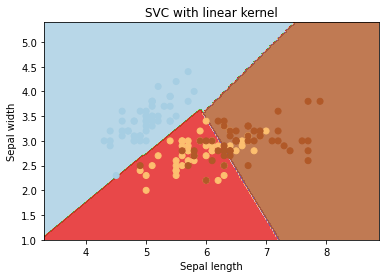

In [12]:
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()

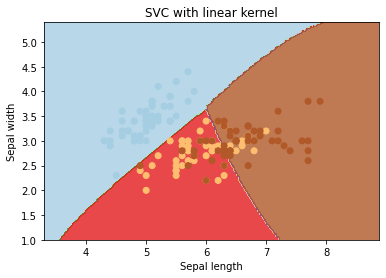

In [16]:
svc = svm.SVC(kernel='rbf', C=1).fit(X, y)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()